<font style="font-size:28px;" align="left"><b>Algorytm Grovera - cz. 3: Implementacja </b></font>

Teraz zastanowimy się, jak zaimplementować wyszukiwanie Grovera. Przypomnijmy cały algorytm.

Dano nam elementy $N=2^n$ i jeden element jest zaznaczony. Zadanie polega na odnalezieniu tego zaznaczonego elementu.

Będziemy używać $n$ kubitów. Na początku zastosujemy bramkę Hadamarda do każdego kubitu, dzięki czemu nasz stan kwantowy zostanie wprowadzony w superpozycję. Amplituda każdego stanu bazowego $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $ jest ustawiona na $ \frac{1}{\sqrt{N}} $. Następnie iterujemy kilka razy następujący algorytm:
<ul>
     <li>Utwórz zapytanie: zastosuj operator zapytania wyroczni (query) do kubitów - odwraca znak amplitudy stanu odpowiadającego zaznaczonemu elementowi.</li>
     <li>Inwersja: zastosuj macierz dyfuzji – amplituda każdego stanu jest odbijana względem średniej wszystkich amplitud.</li>
</ul>

Sprawdźmy jak możemy zaimplementować operacje zapytania i inwersji.

<h3>Operacja zapytania</h3>

<h4>Wyrocznia</h4>

Załóżmy, że istnieje funkcja $f:\{0,1\}^n \rightarrow \{0,1\}$ o następujących właściwościach:

\begin{align*}
f(x)&=1 &\mbox{ jeśli zaznaczono $x$}\\
f(x)&=0 &\mbox{ w przeciwnym razie}
\end{align*}

Algorytm Grovera w rzeczywistości nie przeszukuje listy elementów, ale mając funkcję $f$ o powyższych właściwościach, znajduje element $x$ taki, że $f(x)=1$.

<h3>Zadanie 1 (Dyskusja)</h3>


Rozważmy następującą funkcję $f:\{0,1\}^2 \rightarrow \{0,1\}$. Który element jest zaznaczony? Ile zapytań należy wykonać do $f$, aby w najgorszym przypadku znaleźć zaznaczony element?
$$
f: \begin{array}{c|c} \mathbf{In} & \mathbf{Out} \\ \hline \ket{00} & 0 \\ \ket{01} & 0 \\ \ket{10} & 0 \\ \ket{11} & 1 \end{array}
$$

$f$ jest często nazywane <font color="blue">wyrocznią</font> lub czarną skrzynką. Chociaż $f$ może nie być odwracalne, można je zaimplementować w sposób odwracalny, korzystając z następującego pomysłu.

<img src="images/foperator.png" width="20%" align="centrum">

Tutaj odpowiedni operator kwantowy $U_f$ jest zdefiniowany w następujący sposób:

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $$ gdzie $\oplus$ oznacza dodawanie bitowe modulo 2 (XOR).

Należy pamiętać, że to mapowanie jest odwracalne. Kiedy $\ket{y}=\ket{0}$, otrzymasz dokładnie $f(x)$ na kubicie wyjściowym.

<h4>Odwrócenie znaku </h4>

W dalszej części dyskusji będziemy zakładać, że mamy dany obwód kwantowy realizujący operator $U_f$. Operator odwracający znak amplitudy stanu odpowiadającego zaznaczonemu elementowi $x$ można skonstruować wykorzystując <font color="blue">odbicie fazy</font> (phase kickback).

Załóżmy teraz, że $\ket{y}=\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ i zbadajmy wpływ operatora $U_f$.

\begin{align*}
U_f \ket{x}\ket{-} &= U_f \ket{x}  \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= \frac{1}{\sqrt{2}} (U_f\ket{x}\ket{0}-U_f\ket{x}\ket{1}) \\
&= \frac{1}{\sqrt{2}} (\ket{x}\ket{f(x)\oplus 0} - \ket{x}\ket{f(x)\oplus 1}) \\
&= \ket{x} \frac{1}{\sqrt{2}}\mypar{ \ket{f(x)}-\ket{f(x)\oplus 1}  } \\
&= \ket{x} (-1)^{f(x)} \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= (-1)^{f(x)} \ket{x} \ket{-}
\end{align*}

Mamy następującą transformację:
   $$  \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $$

Przygotowując rejestr wyjściowy (|y>) w stanie $\ket{-}$ i stosując $U_f$, uzyskujemy efekt odwrócenia znaku. Zauważ, że nawet jeśli nic nie wiemy o $f$ (dlatego nazywa się to czarną skrzynką), to jesteśmy w stanie odwrócić znak amplitudy zaznaczonego elementu wykonując zapytanie do $f$, ustawiając kubit wyjściowy do $\ket{-}$.


<h3>Zadanie 2</h3>


Niech $N=4$. Zaimplementuj fazę zapytania (query) i sprawdź macierz unitarną dla operatora zapytania. Zauważ, że interesuje nas lewy górny róg macierzy 4 $ \times 4$, ponieważ pozostałe części wynikają z kubitu pomocniczego (ancilla).

Dostajesz funkcję $f$ i odpowiadający jej operator kwantowy $U_f$. Najpierw uruchom następującą komórkę, aby załadować operator $U_f$. Następnie możesz wykonywać zapytania do $f$, stosując operator $U_f$ za pomocą następującego polecenia:

<pre>Uf(obwód,qreg).

In [1]:
%run quantum.py

Teraz użyj odbicia fazowego, aby odwrócić znak zaznaczonego elementu:

<ul>
     <li>Ustaw kubit wyjściowy (qreg[2]) na $\ket{-}$, stosując X i H.</li>
     <li>Zastosuj operator $U_f$
     <li>Ustaw z powrotem kubit wyjściowy (qreg[2]).</li>
</ul>

(Czy potrafisz odgadnąć zaznaczony element, patrząc na macierz unitarną?)

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  1.0


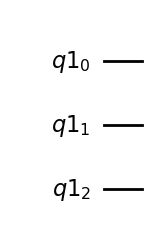

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
#No need to define classical register as we are not measuring

mycircuit = QuantumCircuit(qreg)


#
#Your code here
#


job = execute(mycircuit,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit,decimals=3).data

#We are interested in the top-left 4x4 part
for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    

mycircuit.draw(output='mpl')

<hr>

W Zadaniu 2 widzimy, że operator zapytania wygląda jak operator tożsamości z jednym z wpisów równym -1, co odpowiada za odwrócenie znaku.

$\mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1}$.

Patrząc na macierz, możemy zgadnąć, że zaznaczony element to $\ket{11}$. Należy pamiętać, że generalnie nie można zajrzeć do macierzy odpowiadającej operatorowi zapytania i dlatego po pojedynczym zapytaniu nie da się znaleźć zaznaczonego elementu.

<h3>Operator inwersji</h3>

Aby zaimplementować operację inwersji (dyfuzji), będziemy potrzebować dodatkowego kubitu pomocniczego (ancilla). Oto jak implementujemy operator inwersji:

<ul>
     <li>Ustaw kubit ancilla na $\ket{-}$, stosując X i H.</li>
     <li>Zastosuj H do wszystkich kubitów innych niż ancilla.</li>
     <li>Zastosuj X do wszystkich kubitów innych niż ancilla.</li>
     <li>Zastosuj wielokrotny kontrolowany operator NOT, gdzie kubit ancilla jest celem, a wszystkie inne kubity są używane do sterowania.</li>
     <li>Zastosuj X do kubitu ancilla.</li>
     <li>Zastosuj X do wszystkich kubitów innych niż ancilla.</li>
     <li>Zastosuj H do wszystkich kubitów innych niż ancilla.</li>
     <li>Ustaw kubit Ancilla, stosując X i H.</li>
</ul>

<h4>Dlaczego wybrano te bramki? (Opcjonalnie) </h4>

Spróbujmy teraz zrozumieć, dlaczego wybrano te bramki. Przypomnijmy sobie operator inwersji:

$$ 2 \mymatrix{ccc}{
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     \vdots & \ddots & \vdots \\
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     }
- I . $$


Operator ten nazywany jest także <font color="blue">operatorem dyfuzji</font>.

Przypomnijmy, że operator dyfuzji można wyrazić jako $D=2\ket{u}\bra{u}-I$ gdzie $\ket{u}=H^{\otimes n}\ket{0^n}$. Będziemy po prostu oznaczać $\ket{0^n}$ przez $\ket{\mathbf{0}}$.

- Na początek wyraźmy $D$ w następujący sposób:

\begin{align*}
D=2\ket{u}\bra{u}-I &= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}- I \\
&= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}H^{\otimes n}\ \
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}) \\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}-I)H^{\otimes n}
\end{align*}

<font color="blue"><i>Patrząc na to wyrażenie, staje się jasne, dlaczego na początku i na końcu mamy bramki H</i>

- Teraz przyjrzyjmy się efektowi zastosowania $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ do dowolnego stanu z dziedziny $f$.

$(2\ket{\mathbf{0}}\bra{\mathbf{0}}-I) \ket{x} = 2\ket{\mathbf{0}}\braket{\mathbf{0}}{ x}-\ket{x} .$

Jeśli $\ket{x}=\ket{\mathbf{0}}$, ponieważ $\braket{\mathbf{0}}{\mathbf{0}}=1$, to $2\ket{\mathbf{0 }}\braket{\mathbf{0}}{\mathbf{0}}-\ket{\mathbf{0}} = 2\ket{\mathbf{0}}-\ket{\mathbf{0}} = \ket{\mathbf{0}}$.

Jeśli $\ket{x}\neq \ket{\mathbf{0}}$, ponieważ $\braket{\mathbf{0}}{x}=0$, to $2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x}= 2\ket{\mathbf{0}}\cdot 0 -\ket{x} = -\ket{x}$.

Zatem efektem $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ jest odwrócenie amplitudy dowolnego stanu z wyjątkiem $\ket{\mathbf{0}}$.

- Zobaczmy teraz, jak możemy zaimplementować ten operator. Zdefiniujmy funkcję $g$ w następujący sposób:

\begin{align*}
g(x)&=0 &\mbox{ jeśli $x$ wynosi $\ket{\mathbf{0}}$ }\\
g(x)&=1 &\mbox{ w przeciwnym razie},
\end{align*}



Ustawmy qubit ancilla na stan $\ket{-}$ i zastosujmy operator $U_g$.
\begin{align*}
U_g \ket{x}\ket{-} &= (-1)^{g(x)} \ket{x} \ket{-}.
\end{align*}


Zauważ, że $U_g$ odwraca amplitudy stanów innych niż $\ket{\mathbf{0}}$ i dokładnie implementuje $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$.

- Jak zaimplementować $U_g$?

Rozważmy $g'$, które jest dokładnym przeciwieństwem $g$.

\begin{align*}
g'(x)&=1 &\mbox{ jeśli $x$ wynosi $\ket{\mathbf{0}}$ }\\
g'(x)&=0 &\mbox{ w przeciwnym razie},
\end{align*}

Aby zaimplementować $U_g'$, powinniśmy wyprowadzić 1, gdy $x$ wynosi $\ket{\bf 0}$, to znaczy powinniśmy zastosować bramkę $X$ do kubitu wyjściowego, gdy wszystkie kubity wejściowe są w stanie 0.

Właśnie uzyskaliśmy odwrotny efekt $g$: kubit wyjściowy jest ustawiony na 1, jeśli wszystkie kubity wejściowe są w stanie 0.

<font color="blue"><i>Dlatego stosujemy bramkę $X$ do kubitu ancila, tak aby wynik wynosił 1, gdy $x$ nie wynosi $\ket{\bf{0}}$, a wynikiem było 0 w przeciwnym razie. </i>

<h3>Zadanie 3</h3>

Niech $N=4$. Zaimplementuj operator inwersji i sprawdź, czy otrzymasz następującą macierz:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

In [ ]:
def inversion(circuit,quantum_reg):
    
#don't implement the first and last steps in which ancilla qubit is set


#
# your code is here
#

Poniżej możesz sprawdzić macierz swojego operatora inwersji i jak wygląda obwód. Nas interesuje lewa górna część macierzy 4 $ \times 4$, pozostałe części wynikają z użycia kubitu ancilla.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)

mycircuit1 = QuantumCircuit(qreg1)

#set ancilla qubit
mycircuit1.x(qreg1[2])
mycircuit1.h(qreg1[2])
    
inversion(mycircuit1,qreg1)

#set ancilla qubit back
mycircuit1.h(qreg1[2])
mycircuit1.x(qreg1[2])


job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3).data
for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
mycircuit1.draw(output='mpl')

Poniżej możesz sprawdzić macierz swojego operatora inwersji i jak wygląda obwód. Nas interesuje lewa górna część macierzy 4 $ \times 4$, pozostałe części wynikają z użycia kubitu ancilla.

In [ ]:
%run quantum.py

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)

mycircuit = QuantumCircuit(qreg,creg)

#Grover


#initial step - equal superposition
#
#your code here
#

#set ancilla 
#
#your code here
#



#change the number of iterations
iterations=1

#Grover's iterations.
#
#Query operator
#
#Inversion operator
#
   
#set ancilla
#
#your code here
#

mycircuit.measure(qreg[0],creg[0])
mycircuit.measure(qreg[1],creg[1])

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(mycircuit)

# print the outcome
for outcome in counts:
    print(outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')

<h3>Zadanie 5 (opcjonalne, wymagające)</h3>

Zaimplementuj operację inwersji dla $n=3$ ($N=8$). Tym razem będziesz potrzebować 5 kubitów - 3 do operacji, 1 do ancilli i jeszcze jednego kubitu do zaimplementowania bramki nie kontrolowanej przez trzy kubity.

W implementacji kubitem ancilla będzie kubit 3, podczas gdy kubity sterujące to 0, 1 i 2; kubit 4 jest używany do operacji wielokrotnego sterowania. W rezultacie powinieneś otrzymać następujące wartości w lewym górnym wpisie $8 \times 8$:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

In [ ]:
def big_inversion(circuit,quantum_reg):
    
    
#
# your code is here
#


Poniżej możesz sprawdzić macierz operatora inwersji. Nas interesuje lewy górny róg macierzy wynoszący 8 $ \times 8$, pozostałe części wynikają z dodatkowych kubitów.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg2 =  QuantumRegister(5)

big_mycircuit2 = QuantumCircuit(big_qreg2)

#set ancilla
big_mycircuit2.x(big_qreg2[3])
big_mycircuit2.h(big_qreg2[3])
    
big_inversion(big_mycircuit2,big_qreg2)

#set ancilla back
big_mycircuit2.h(big_qreg2[3])
big_mycircuit2.x(big_qreg2[3])

job = execute(big_mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit2,decimals=3).data
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

<h3>Zadanie 6: Testowanie wyszukiwania Grovera pod kątem 8 elementów (opcjonalne, wymagające)</h3>

Teraz przetestujemy wyszukiwanie Grovera na 8 elementach.

Dostajesz operator $U_{f_8}$. Najpierw uruchom następującą komórkę, aby ją załadować. Możesz uzyskać do niego dostęp poprzez:

<pre>Uf_8(obwód,qreg)</pre>
    
Który stan obserwujesz najczęściej?

In [ ]:
%run quantum.py

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg8 =  QuantumRegister(5)
creg8 = ClassicalRegister(3)

mycircuit8 = QuantumCircuit(qreg8,creg8)


#
#Your code here
#

job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
counts8 = job.result().get_counts(mycircuit8)
# print the reverse of the outcome
for outcome in counts8:
    print(outcome,"is observed",counts8[outcome],"times")

mycircuit8.draw(output='mpl')

<h3>Zadanie 7 (opcjonalne)</h3>

Czy pamiętasz optymalną liczbę iteracji, aby znaleźć zaznaczony element za pomocą wyszukiwania Grovera? Otrzymasz następujący kod, który implementuje wyszukiwanie Grovera. (<i>giant_oracle</i> i <i>giant_diffusion</i> są już zaimplementowane.) Jest jeden zaznaczony element. Najpierw określ całkowitą liczbę elementów w przestrzeni poszukiwań. Następnie spróbuj znaleźć optymalną liczbę iteracji. Możesz sprawdzić swoje przypuszczenia, zmieniając wartość <i>iteration_count</i>. Sprawdź także mniej optymalne opcje, takie jak <i>iteration_count-1</i>, <i>iteration_count+1</i>.
    
Spróbuj także wywołać funkcję <i>giant_oracle2</i>, która zaznacza 2 elementy i spróbuj znaleźć optymalną liczbę iteracji.

In [ ]:
%run quantum.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg12 =  QuantumRegister(19)
creg12 = ClassicalRegister(10)

mycircuit12 = QuantumCircuit(qreg12,creg12)

for i in range(10):
    mycircuit12.h(qreg12[i])

mycircuit12.x(qreg12[10])
mycircuit12.h(qreg12[10])

#number of iterations - change this value
iteration_count = 1
for i in range(iteration_count):
    giant_oracle2(mycircuit12,qreg12)
    giant_diffusion(mycircuit12,qreg12)
    
mycircuit12.h(qreg12[10])
mycircuit12.x(qreg12[10])

for i in range(10):
    mycircuit12.measure(qreg12[i],creg12[i])

job = execute(mycircuit12,Aer.get_backend('qasm_simulator'),shots=100000)
counts12 = job.result().get_counts(mycircuit12)
# print the reverse of the outcome
for outcome in counts12:
    print(outcome,"is observed",counts12[outcome],"times")

<h3>Projektowanie funkcji wyroczni</h3>

Funkcja wyrocznia $f$ zależy od problemu, który chcesz rozwiązać. Możesz modelować wiele różnych problemów (takich jak kolorowanie wykresów, komiwojażer i wiele innych) jako problem wyszukiwania. Elementy w Twojej przestrzeni poszukiwań odpowiadają stanom kwantowym. Zamiast przeszukiwać całą przestrzeń, projektujesz $f$ tak, aby sprawdzało, czy element w przestrzeni poszukiwań jest rzeczywistym rozwiązaniem i zaznaczało to, wypisując 1. Następnie możesz użyć wyszukiwania Grovera, aby znaleźć rozwiązanie.

Teraz zaprojektujemy bardzo prostą funkcję wyroczni, która po prostu zaznaczy jeden z elementów. Załóżmy, że $N=4$. Nasze elementy w przestrzeni poszukiwań to $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$ i załóżmy, że chcemy zaznaczyć element $\ket {11}$. Oznacza to, że funkcja powinna wyprowadzić wartość 1, jeśli kubity wejściowe są w stanie 1. Można to po prostu osiągnąć za pomocą następującej funkcji:

In [ ]:
def oracle_11(circuit,qreg):
    circuit1.ccx(qreg[0],qreg[1],qreg[2])             

Tutaj qreg[0] i qreg[1] to kubity wejściowe, a qreg[2] to kubit wyjściowy. Sprawdźmy macierz odpowiadającą fazie zapytania.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)

circuit1 = QuantumCircuit(qreg1)

# prepare ancilla qubit
circuit1.x(qreg1[2])
circuit1.h(qreg1[2])

#call the oracle
oracle_11(circuit1,qreg1)

# put ancilla qubit back into state |0>
circuit1.h(qreg1[2])
circuit1.x(qreg1[2])

job = execute(circuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(circuit1,decimals=3).data
for i in range(4):
    s=""
    for j in range(4):
        val = str(round(u[i][j].real,3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit1.draw(output='mpl')

Sprawdźmy inny przykład, teraz naszym zaznaczonym elementem jest $\ket{01}$.

In [ ]:
def oracle_01(circuit,qreg):
    circuit.x(qreg[1])
    circuit.ccx(qreg[0],qreg[1],qreg[2])
    circuit.x(qreg[1])

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)

circuit1 = QuantumCircuit(qreg1)

# prepare ancilla qubit
circuit1.x(qreg1[2])
circuit1.h(qreg1[2])

#call the oracle
oracle_01(circuit1,qreg1)

# put ancilla qubit back into state |0>
circuit1.h(qreg1[2])
circuit1.x(qreg1[2])

job = execute(circuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(circuit1,decimals=3).data
for i in range(4):
    s=""
    for j in range(4):
        val = str(round(u[i][j].real,3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit1.draw(output='mpl')

<h3>Zadanie 8</h3>

Zaimplementuj funkcję wyroczni, która zaznacza element $\ket{00}$. Uruchom wyszukiwanie Grovera za pomocą zaimplementowanej wyroczni. 

In [ ]:
def oracle_00(circuit,qreg):
    #Your code here
    #
    #

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Grover's search





<h3>Zadanie 9 (opcjonalne)</h3>

Niech $N = 8$. Zaimplementuj funkcję wyroczni, która zaznacza elementy $\ket{001}$ i $\ket{111}$. Uruchom wyszukiwanie Grovera za pomocą zaimplementowanej wyroczni.

In [ ]:
def oracle_001_111(circuit,qreg):
    #Your code here
    #
    #

Dalsze linki:

http://quantumgazette.blogspot.com/2017/12/grovers-algorithm-for-unstructured.html

http://twistedoakstudios.com/blog/Post2644_grovers-quantum-search-algorithm